In [1500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# Import Dataset

In [1501]:
df = pd.read_csv("loan_data.csv")

In [1502]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [1503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [1504]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [1505]:
numerical_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]

In [1506]:
categorical_cols = ['quarter', 'department', 'day', 'team']

# Data Cleaning

## Bersihkan Data Duplikat

In [1507]:
df.duplicated().sum()

np.int64(0)

## Bersihkan Nilai Null

In [1508]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


# Analisis Data Eksploratif

# Korelasi Variabel

## Analisis Korelasi Variabel Kontinu dengan Pearson

In [1509]:
continu_corr = df[numerical_cols].corr(method='pearson')

In [1510]:
continu_corr

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


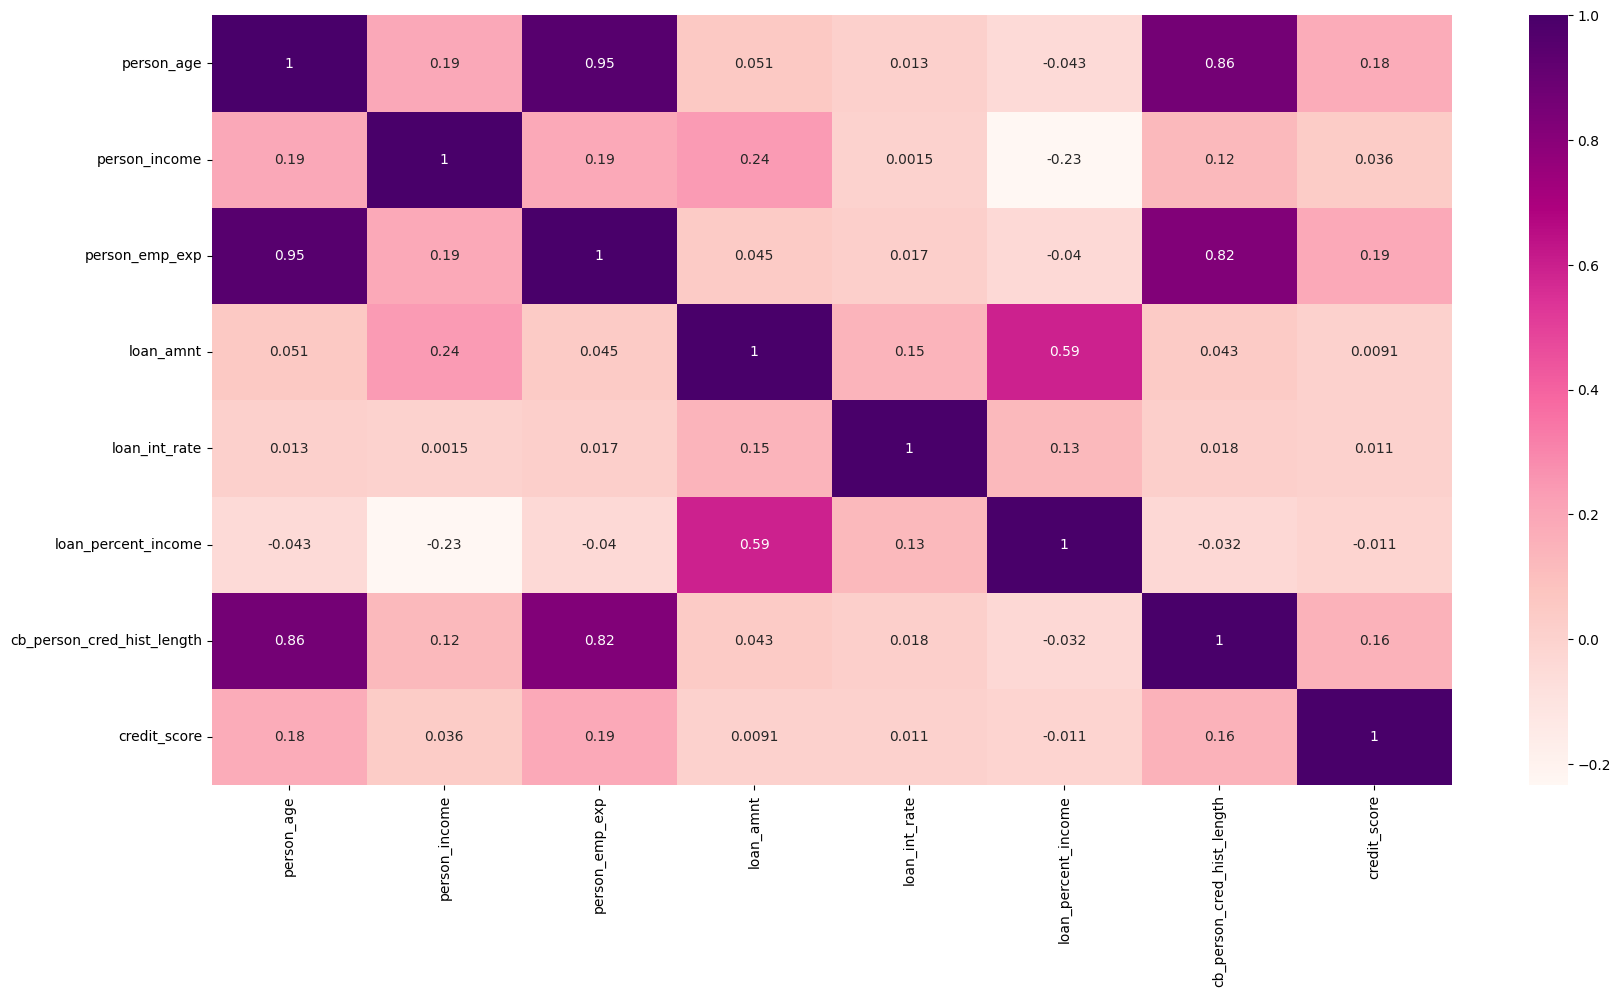

In [1511]:
plt.figure(figsize=(20, 10))
sns.heatmap(continu_corr, annot=True, cmap='RdPu')
plt.show()

## Analisis Korelasi Variabel Nominal dengan Chi2

# Standarisasi dan Cek Outlier


## Standarisasi

In [1512]:
target_col = "loan_status"

In [1513]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())
df.to_csv("loan_data_standarisasi.csv", index=False)

   person_age person_gender person_education  person_income  person_emp_exp  \
0   -0.953538        female           Master      -0.104090       -0.892284   
1   -1.118963        female      High School      -0.846005       -0.892284   
2   -0.457264        female      High School      -0.844065       -0.397517   
3   -0.788113        female         Bachelor      -0.007039       -0.892284   
4   -0.622689          male           Master      -0.176371       -0.727362   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT   4.024953    PERSONAL       1.683039   
1                   OWN  -1.359209   EDUCATION       0.044782   
2              MORTGAGE  -0.646600     MEDICAL       0.625557   
3                  RENT   4.024953     MEDICAL       1.417829   
4                  RENT   4.024953     MEDICAL       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             4.016394                   -0.739109     -1.419814  

## Tindakan Terhadap Outlier

In [1514]:
df = pd.read_csv("loan_data_standarisasi.csv")

In [1515]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,female,Master,-0.104090,-0.892284,RENT,4.024953,PERSONAL,1.683039,4.016394,-0.739109,-1.419814,No,1
1,-1.118963,female,High School,-0.846005,-0.892284,OWN,-1.359209,EDUCATION,0.044782,-0.684829,-0.996863,-2.549975,Yes,0
2,-0.457264,female,High School,-0.844065,-0.397517,MORTGAGE,-0.646600,MEDICAL,0.625557,3.443074,-0.739109,0.047412,No,1
3,-0.788113,female,Bachelor,-0.007039,-0.892284,RENT,4.024953,MEDICAL,1.417829,3.443074,-0.996863,0.840507,No,1
4,-0.622689,male,Master,-0.176371,-0.727362,RENT,4.024953,MEDICAL,1.095549,4.475050,-0.481354,-0.924130,No,1


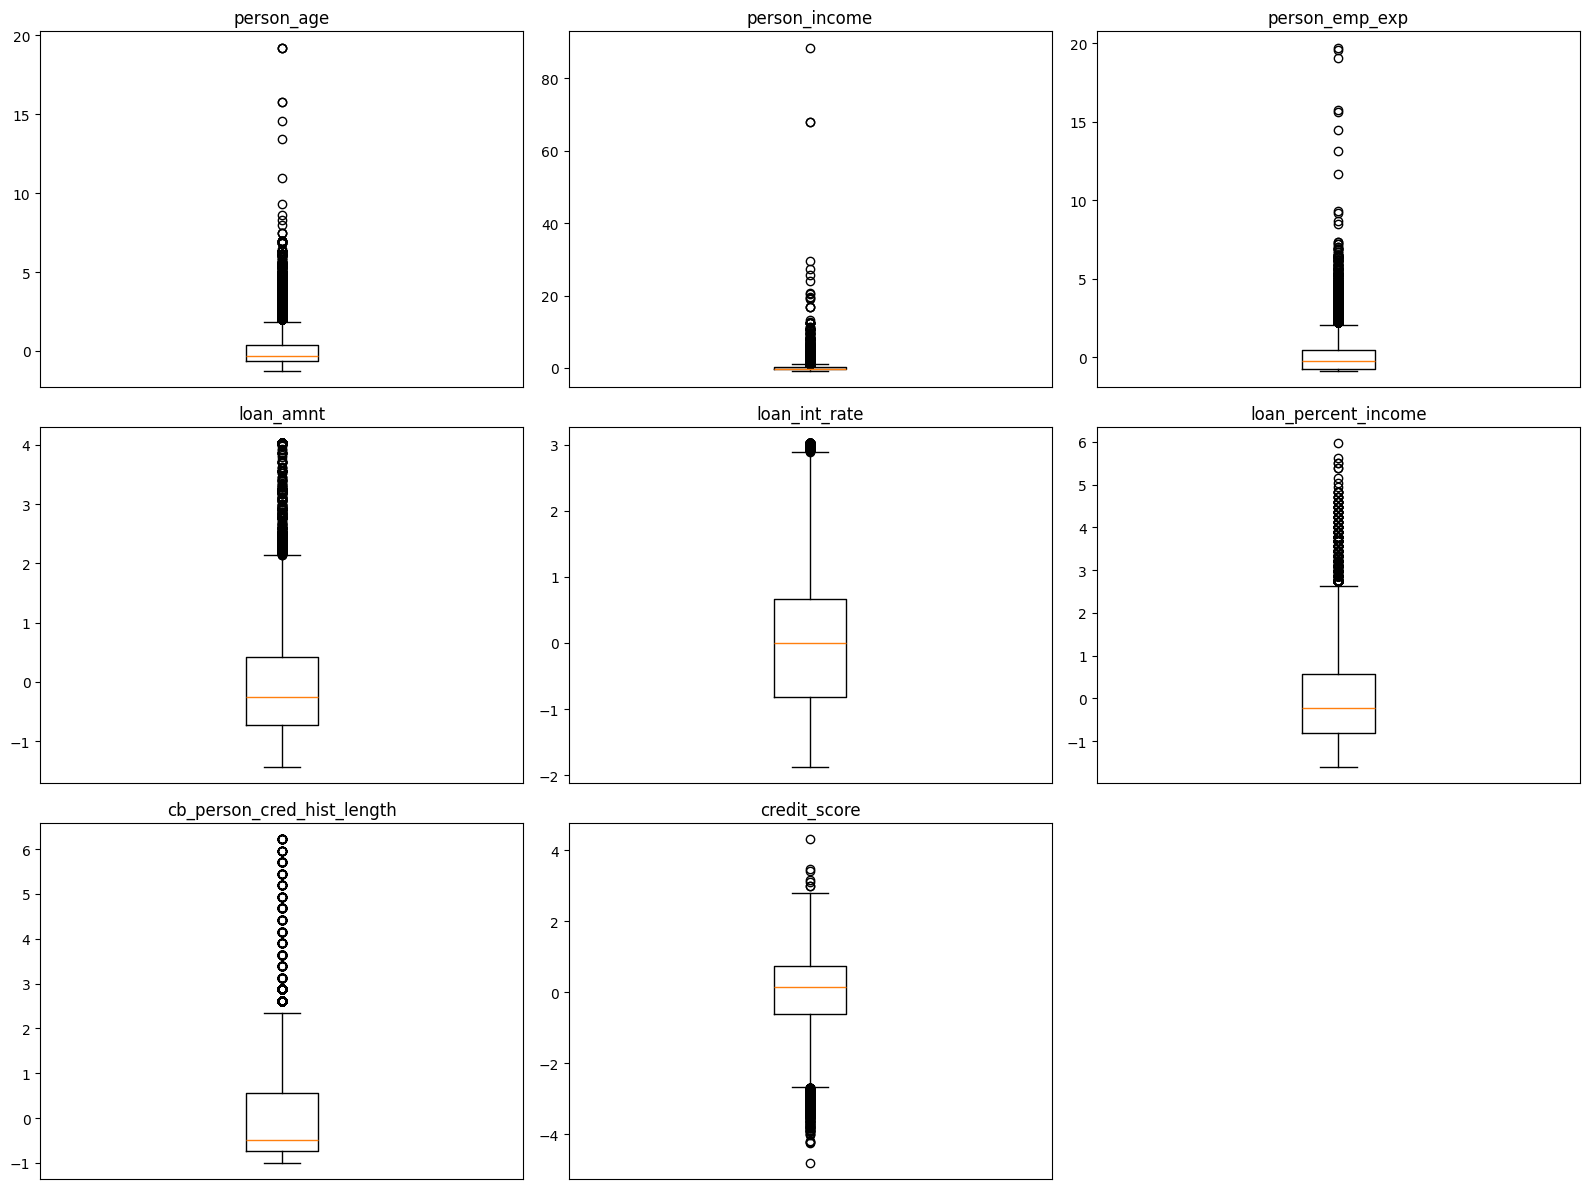

In [1516]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()


Setelah kami visualisaikan menggunakan boxplot, tampak jelas bahwa sebagian besar variabel numerik memiliki nilai yang menyimpang cukup jauh dari mayoritas data. Outlier tersebut muncul pada variabel usia, pendapatan, pengalaman kerja, jumlah pinjaman, hingga skor kredit. Meskipun penyimpangan tersebut dapat mencerminkan kondisi nyata pada sebagian individu, nilai ekstrem yang terlalu jauh dari distribusi utama berpotensi mengganggu proses analisis dan menurunkan kinerja model prediktif. Oleh karena itu, diperlukan langkah penanganan outlier yang tepat agar kualitas data tetap terjaga dan proses pemodelan dapat menghasilkan hasil yang lebih akurat serta dapat diandalkan.

In [1517]:
df_clean = df.copy()

def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)


for col in numerical_cols:
    df_clean[col] = iqr_capping(df_clean[col])


log_cols = ["person_income", "loan_amnt"]
for col in log_cols:
    min_val = df_clean[col].min()
    if min_val <= 0:
        df_clean[col] = df_clean[col] - min_val + 1
    df_clean[col] = np.log(df_clean[col])
print(df_clean.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0   -0.953538        female           Master       0.585094       -0.892284   
1   -1.118963        female      High School       0.051875       -0.892284   
2   -0.457264        female      High School       0.053715       -0.397517   
3   -0.788113        female         Bachelor       0.637746       -0.892284   
4   -0.622689          male           Master       0.543996       -0.727362   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT   1.521218    PERSONAL       1.683039   
1                   OWN   0.076200   EDUCATION       0.044782   
2              MORTGAGE   0.583214     MEDICAL       0.625557   
3                  RENT   1.521218     MEDICAL       1.417829   
4                  RENT   1.521218     MEDICAL       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             2.640426                   -0.739109     -1.419814  

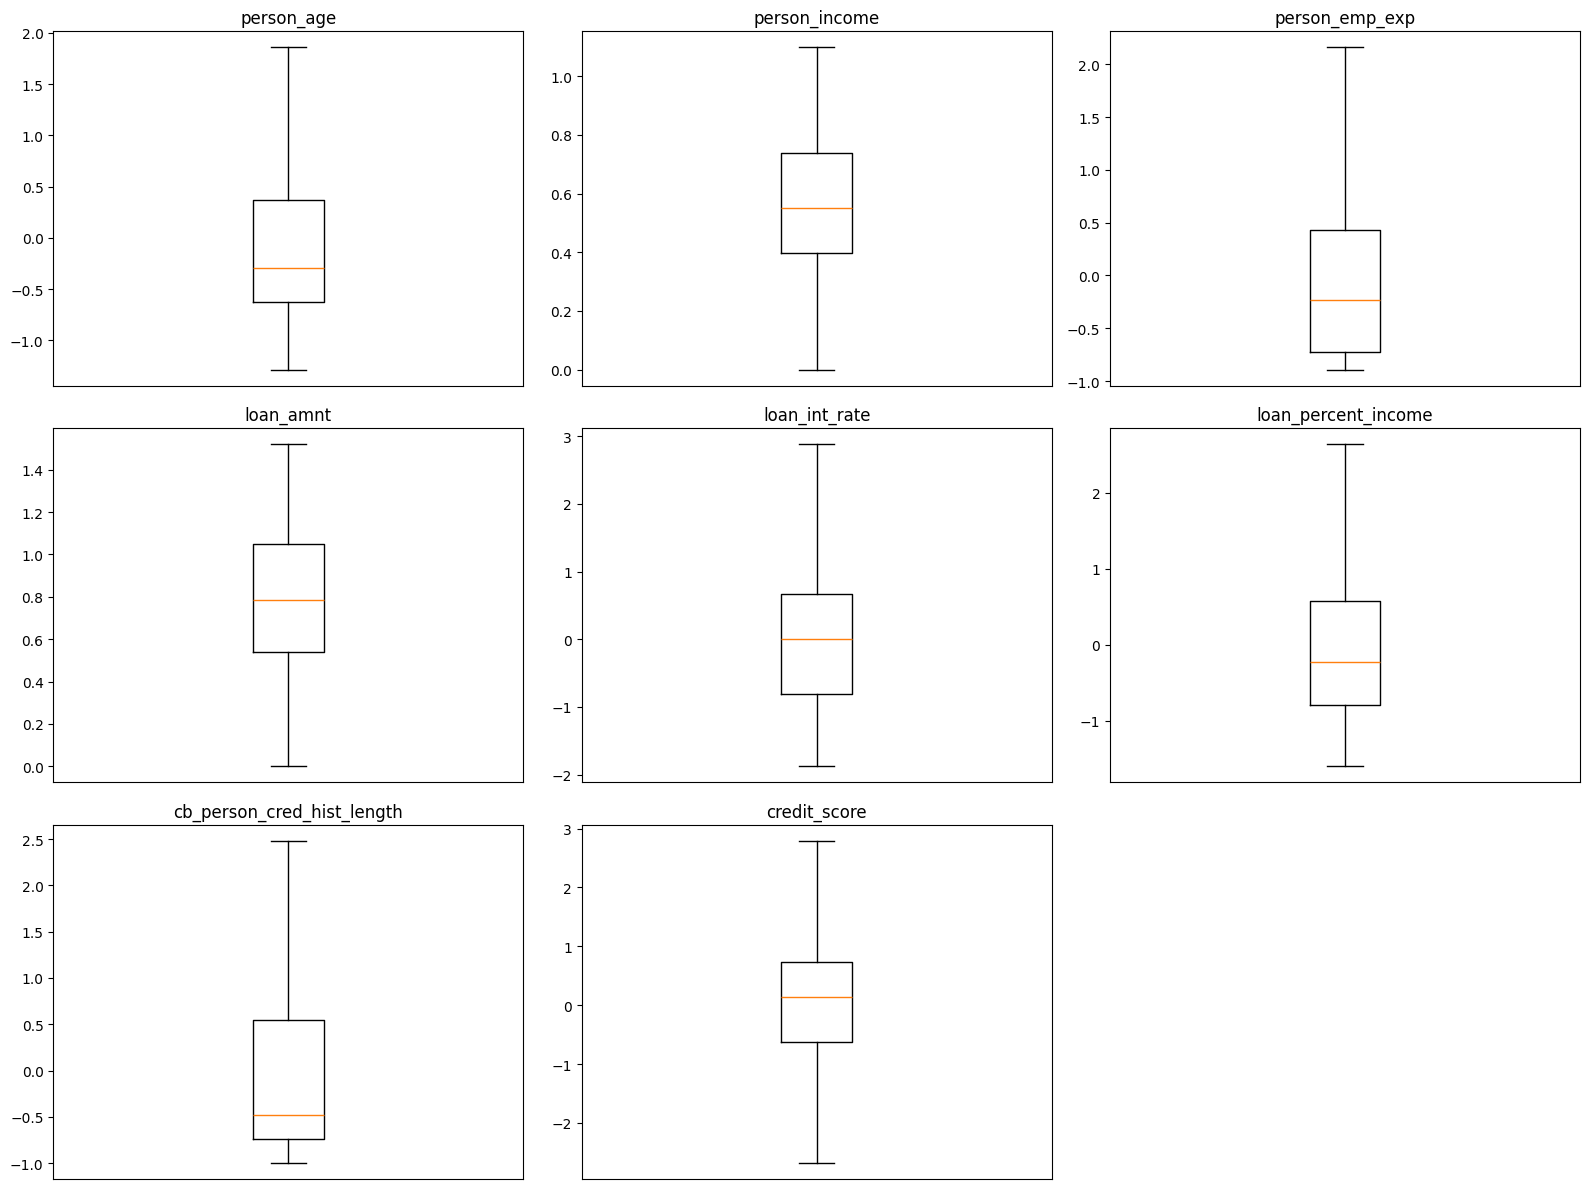

In [1518]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_clean[col].dropna())
    plt.title(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [1519]:
df_clean.shape

(45000, 14)

In [1520]:
df_clean.to_csv('loan_data_clean.csv')

# Data Transform

## Label Encoding

In [1521]:
df_encoded = df_clean.copy()

In [1522]:
label_col = 'previous_loan_defaults_on_file'
le = LabelEncoder()
df_encoded[label_col] = le.fit_transform(df_encoded[label_col])

## One Hot Encoding

In [1523]:
ohe_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent'
]

df_encoded = pd.get_dummies(df_encoded, columns=ohe_cols, drop_first=True, dtype=int)

In [1524]:
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.953538,0.585094,-0.892284,1.521218,1.683039,2.640426,-0.739109,-1.419814,0,1,...,0,1,0,0,1,0,0,0,1,0
1,-1.118963,0.051875,-0.892284,0.076200,0.044782,-0.684829,-0.996863,-2.549975,1,0,...,1,0,0,1,0,1,0,0,0,0
2,-0.457264,0.053715,-0.397517,0.583214,0.625557,2.640426,-0.739109,0.047412,0,1,...,1,0,0,0,0,0,0,1,0,0
3,-0.788113,0.637746,-0.892284,1.521218,1.417829,2.640426,-0.996863,0.840507,0,1,...,0,0,0,0,1,0,0,1,0,0
4,-0.622689,0.543996,-0.727362,1.521218,1.095549,2.640426,-0.481354,-0.924130,0,1,...,0,1,0,0,1,0,0,1,0,0


# Classification Model

## Features Engineering

In [1525]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

## Splitting Data

In [1526]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Standarisasi Data

In [1527]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Modeling

In [1528]:
model_regresilogistik = LogisticRegression(max_iter=1000, random_state=42)
model_regresilogistik.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [1529]:
y_pred = lr.predict(X_test_scaled)

## Evaluasi Model

In [1530]:
print("Classification Report", classification_report(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.76      0.78      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.86      9000
weighted avg       0.90      0.90      0.90      9000



# Regresi Linear Berganda

In [1531]:
X = df_encoded.drop("loan_amnt", axis=1)
y = df_encoded["loan_amnt"]

In [1532]:
X_constant = sm.add_constant(X)

## OLS

In [1533]:
model_regresilinear = sm.OLS(y, X_constant).fit()
print(model_regresilinear.summary())

                            OLS Regression Results                            
Dep. Variable:              loan_amnt   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.578e+04
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:12:45   Log-Likelihood:                 29435.
No. Observations:               45000   AIC:                        -5.882e+04
Df Residuals:                   44977   BIC:                        -5.862e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [1534]:
residuals = model_regresilinear.resid

## Uji Normalitas

In [1535]:
stat, p_value = shapiro(residuals)
print(f"Uji Normalitas Shapiro-Wilk: Statistik={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
    print("Residual terdistribusi normal")
else:
    print("Residual tidak normal")

Uji Normalitas Shapiro-Wilk: Statistik=0.8964, p-value=0.0000
Residual tidak normal


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45000.
  res = hypotest_fun_out(*samples, **kwds)


## Uji Multikolinearitas

In [1536]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["1/VIF"] = 1 / vif_data["VIF"]
print("\nVIF:\n", vif_data)


VIF:
                            feature        VIF     1/VIF
0                       person_age  10.898377  0.091757
1                    person_income   5.225196  0.191380
2                   person_emp_exp   8.239248  0.121370
3                    loan_int_rate   1.122573  0.890810
4              loan_percent_income   1.278348  0.782260
5       cb_person_cred_hist_length   4.293403  0.232915
6                     credit_score   1.132816  0.882756
7   previous_loan_defaults_on_file   2.726225  0.366808
8                      loan_status   2.112295  0.473419
9               person_gender_male   2.131881  0.469069
10       person_education_Bachelor   1.974421  0.506478
11      person_education_Doctorate   1.061501  0.942062
12    person_education_High School   1.866915  0.535643
13         person_education_Master   1.525436  0.655550
14     person_home_ownership_OTHER   1.007226  0.992826
15       person_home_ownership_OWN   1.181111  0.846660
16      person_home_ownership_RENT   2.26

## Uji Heteroskedastisitas

In [1537]:
bp_test = het_breuschpagan(residuals, X_constant)
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
bp_result = dict(zip(labels, bp_test))
print("\nUji Breusch-Pagan:", bp_result)
if bp_result['F p-value'] > 0.05:
    print("Tidak ada heteroskedastisitas")
else:
    print("Ada heteroskedastisitas")


Uji Breusch-Pagan: {'LM Stat': np.float64(3942.941050648137), 'LM p-value': np.float64(0.0), 'F-stat': np.float64(196.33614133948942), 'F p-value': np.float64(0.0)}
Ada heteroskedastisitas


## Uji Autokorelasi

In [1538]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"\nDurbin-Watson: {dw_stat:.3f}")


Durbin-Watson: 1.760
